# Using Pyndamics to Perform Bayesian Parameter Estimation in Dynamical Systems

Pyndamics provides a way to describe a dynamical system in terms of the differential equations, or the stock-flow formalism. It is a wrapper around the Scipy odeint function, with further functionality for time plots, phase plots, and vector fields.  The MCMC component of this package uses emcee: http://dan.iel.fm/emcee/current/.  

Page for this package: [https://code.google.com/p/pyndamics/](https://code.google.com/p/pyndamics/)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import *

In [3]:
from pyndamics import Simulation
from pyndamics.emcee import *

## Artificial Example with Mice Population

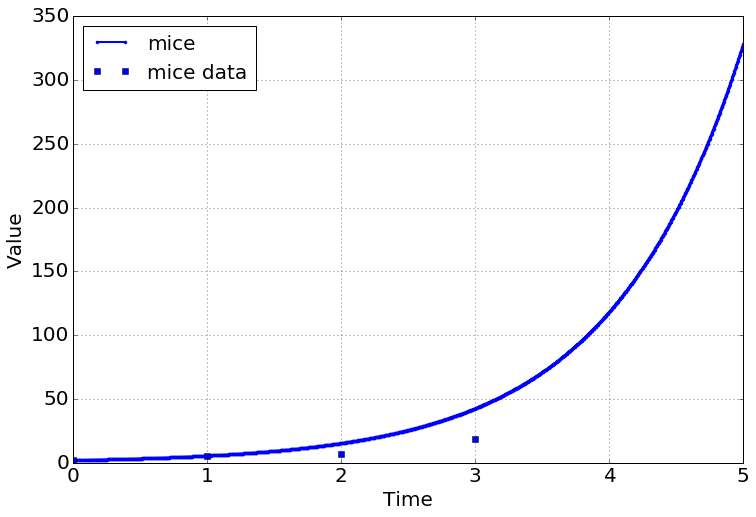

In [2]:
data_t=[0,1,2,3]
data_mouse=[2,5,7,19]

sim=Simulation()                    # get a simulation object

sim.add("mice'=b*mice - d*mice",    # the equations
    2,                            # initial value
    plot=True)                      # display a plot, which is the default

sim.add_data(t=data_t,mice=data_mouse,plot=True)
sim.params(b=1.1,d=0.08)            # specify the parameters
sim.run(5)

In [3]:
model=MCMCModel(sim,b=Uniform(0,10))

Sampling Prior...
Done.
0.21 s


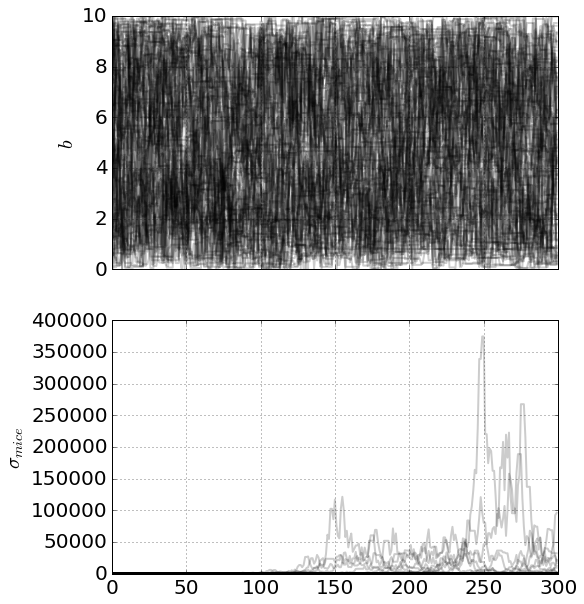

In [4]:
model.set_initial_values()
model.plot_chains()

Running MCMC...
Done.
14.94 s


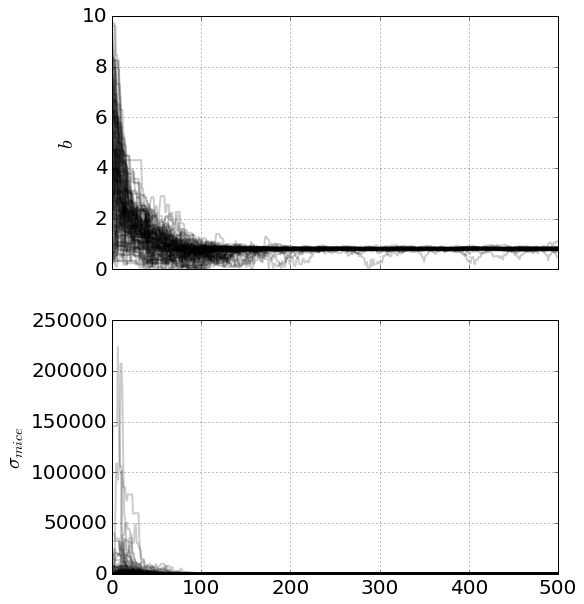

In [5]:
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
15.62 s


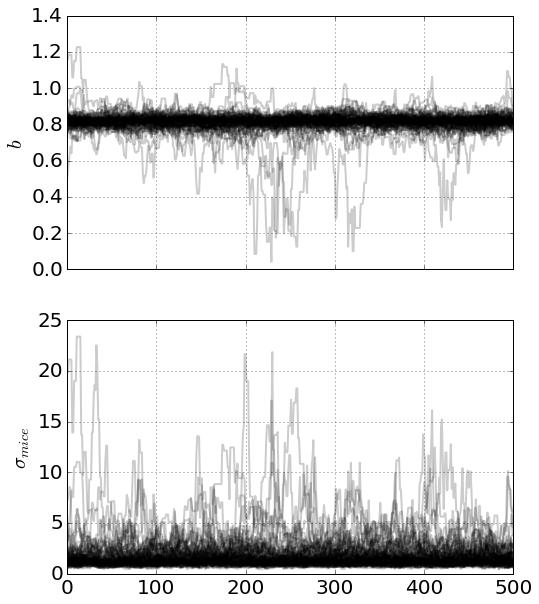

In [6]:
model.run_mcmc(500)
model.plot_chains()

In [7]:
model.best_estimates()

{'_sigma_mice': array([ 0.92005389,  1.35428951,  2.302533  ]),
 'b': array([ 0.79202796,  0.81957059,  0.84360864])}

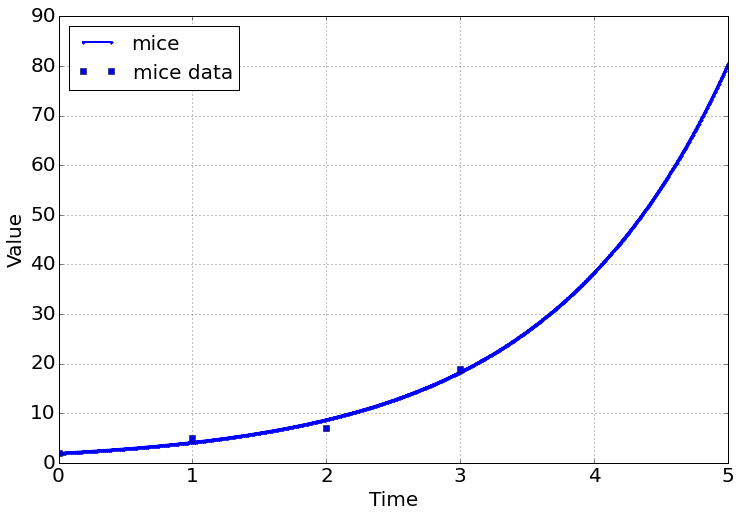

In [8]:
sim.run(5)

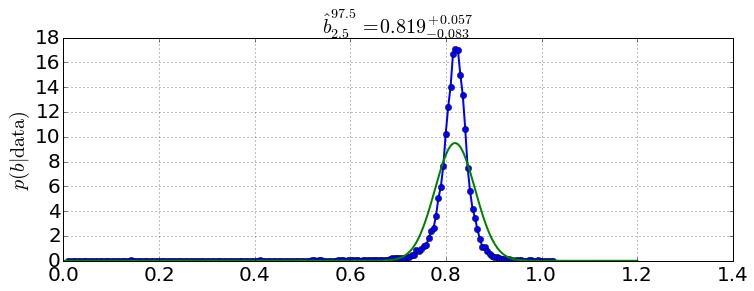

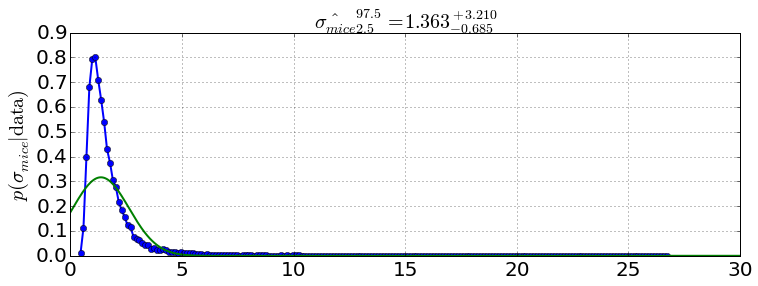

In [9]:
model.plot_distributions()

## A linear growth example

Data from [http://www.seattlecentral.edu/qelp/sets/009/009.html](http://www.seattlecentral.edu/qelp/sets/009/009.html)

### Plot the data

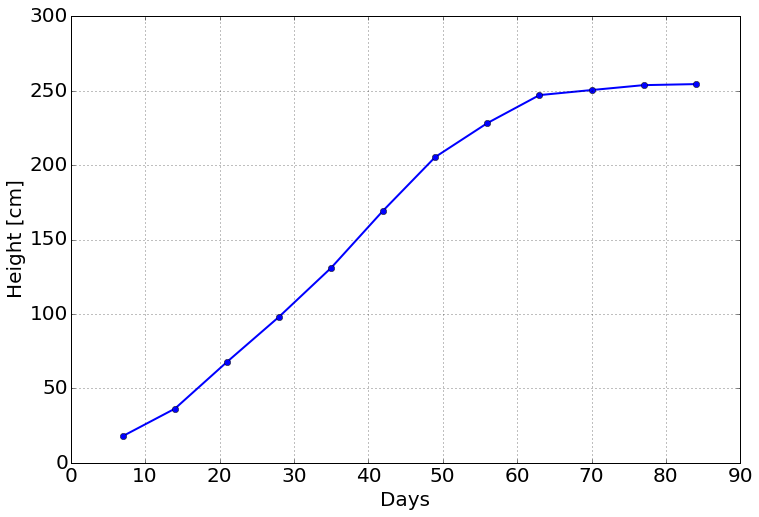

In [10]:
t=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

plot(t,h,'-o')
xlabel('Days')
ylabel('Height [cm]')

### Run an initial simulation

Here, the constant value ($a=1$) is hand-picked, and doesn't fit the data particularly well.

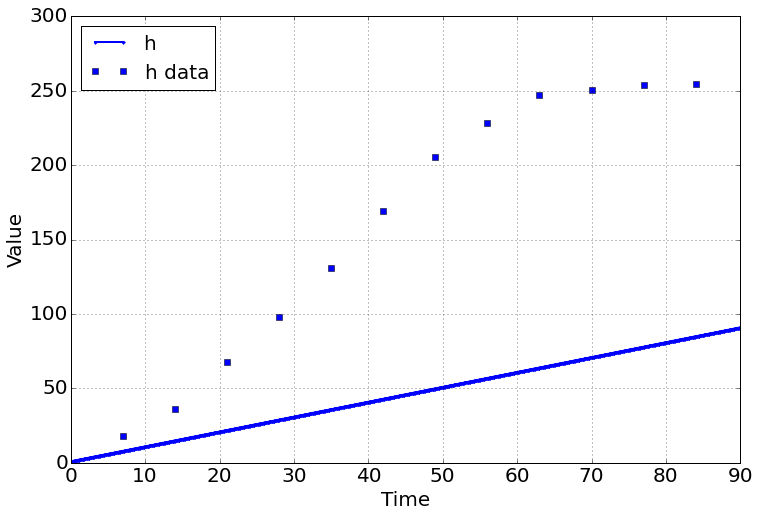

In [11]:
sim=Simulation()
sim.add("h'=a",1,plot=True)
sim.add_data(t=t,h=h,plot=True)
sim.params(a=1)
sim.run(0,90)

### Fit the model parameter, $a$

Specifying the prior probability distribution for $a$ as uniform between -10 and 10.

In [12]:
model=MCMCModel(sim,a=Uniform(-10,10))

Sampling Prior...
Done.
0.21 s
Running MCMC...
Done.
8.64 s


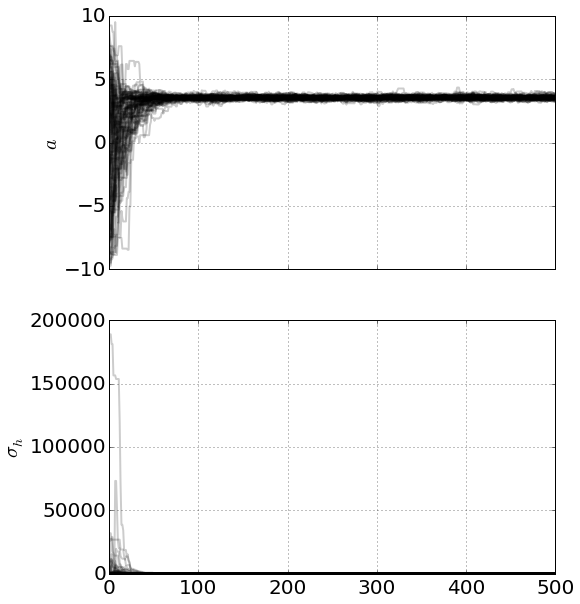

In [13]:
model.run_mcmc(500)
model.plot_chains()

What is the best fit parameter value?

In [14]:
model.best_estimates()

{'_sigma_h': array([ 18.74727177,  23.03455823,  29.09066717]),
 'a': array([ 3.41615233,  3.54639601,  3.67305901])}

### Rerun the model

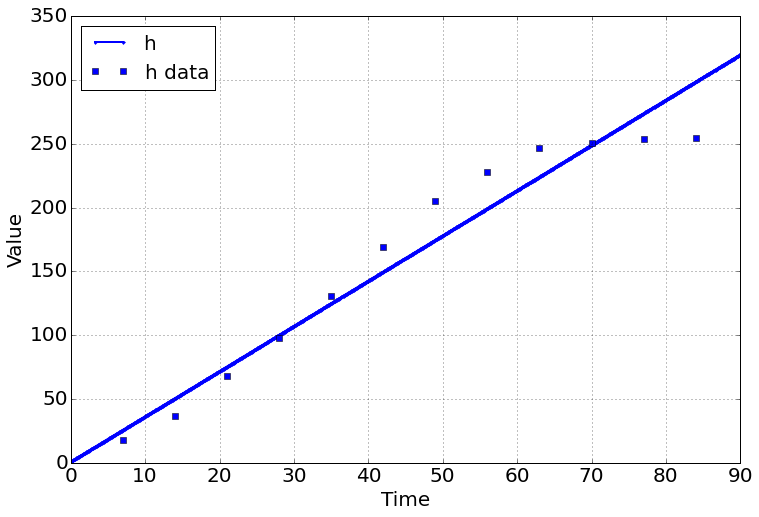

In [15]:
sim.run(0,90)

### Plot the posterior histogram

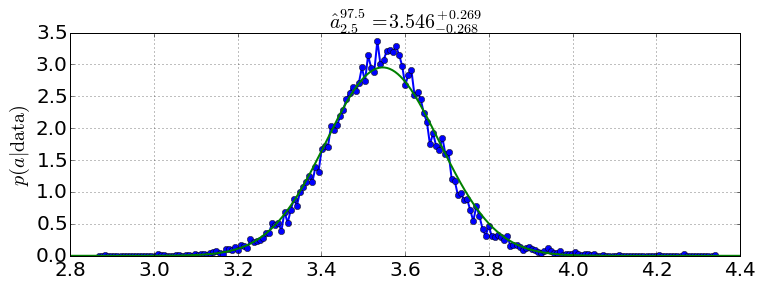

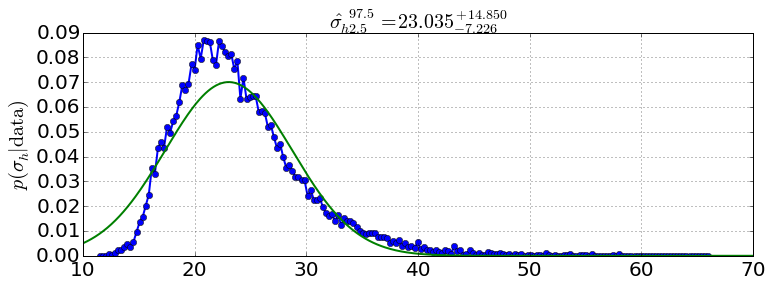

In [16]:
model.plot_distributions()

### Fit the model parameter, $a$, and the initial value of the variable, $h$

In [17]:
model=MCMCModel(sim,
                a=Uniform(-10,10),
                initial_h=Uniform(0,18),
                )

Sampling Prior...
Done.
0.27 s
Running MCMC...
Done.
7.64 s


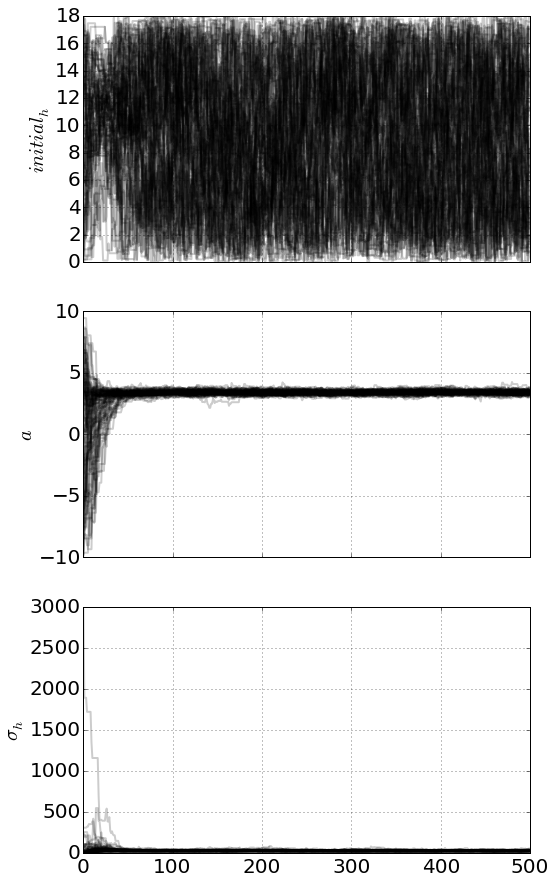

In [18]:
model.run_mcmc(500)
model.plot_chains()

this looks like initial_h is irrelevant - or perhaps our uniform range is too small.

In [19]:
model=MCMCModel(sim,
                a=Uniform(-10,10),
                initial_h=Uniform(0,180),
                )

Sampling Prior...
Done.
0.27 s
Running MCMC...
Done.
8.26 s


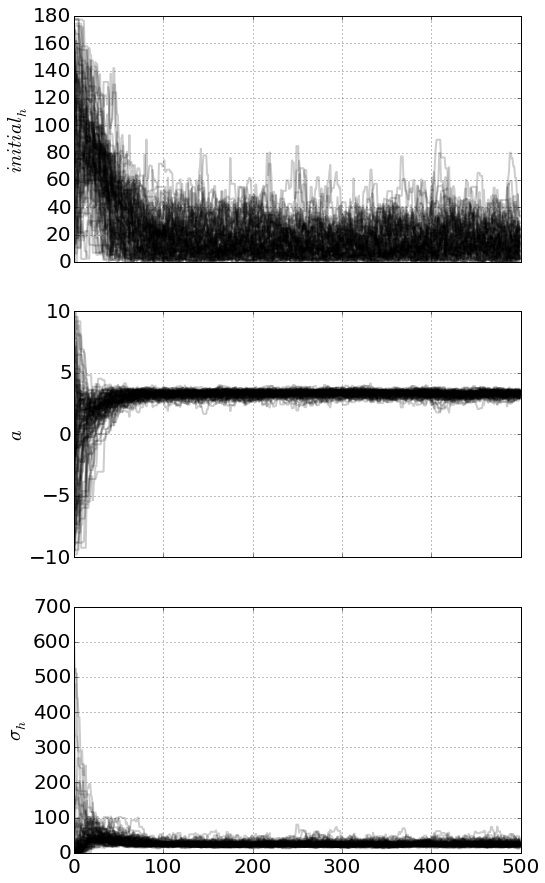

In [20]:
model.run_mcmc(500)
model.plot_chains()

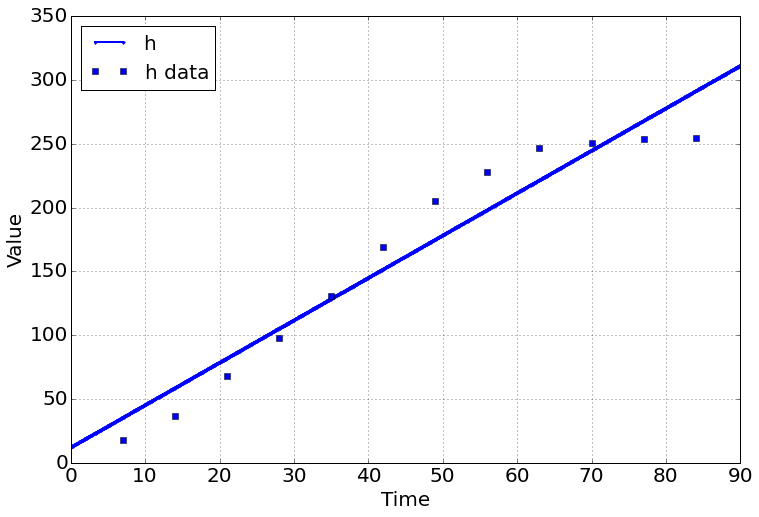

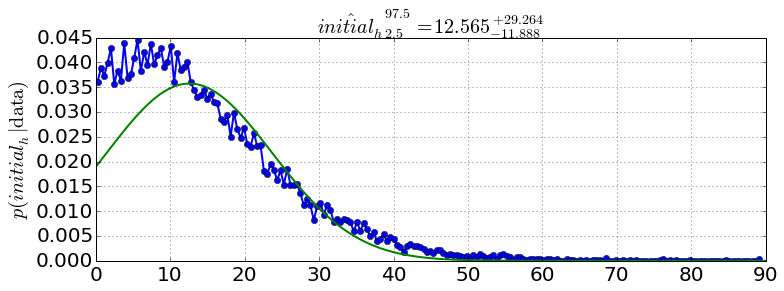

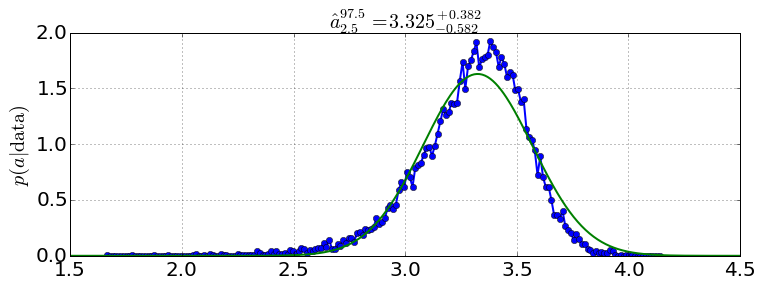

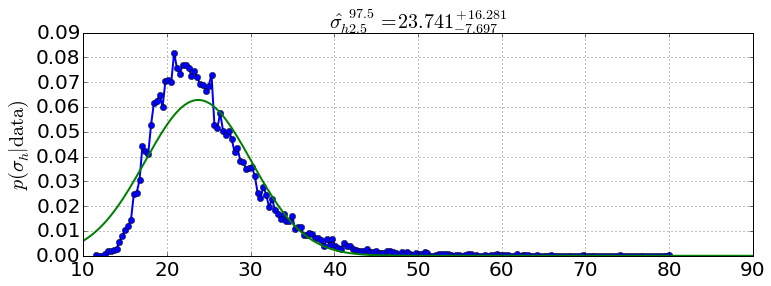

In [21]:
sim.run(0,90)
model.plot_distributions()

### Plot the simulations for many samplings of the simulation parameters

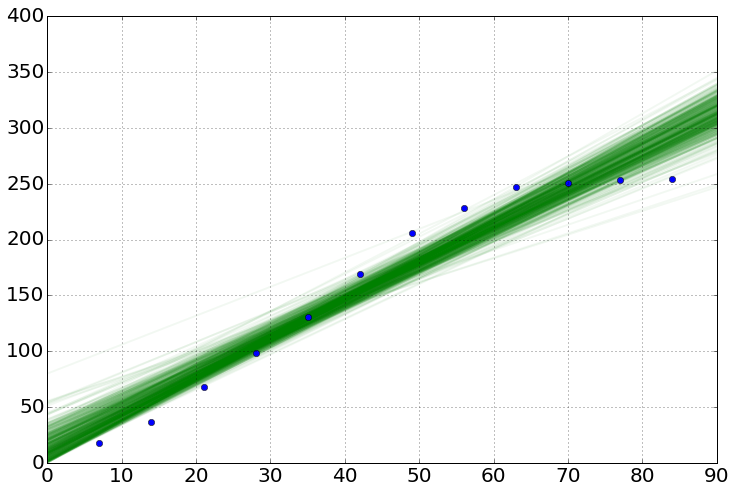

In [22]:
sim.noplots=True  # turn off the simulation plots
for i in range(500):
    model.draw()
    sim.run(0,90)
    plot(sim.t,sim.h,'g-',alpha=.05)
sim.noplots=False  # gotta love a double-negative
plot(t,h,'bo')  # plot the data

## Logistic Model with the Same Data

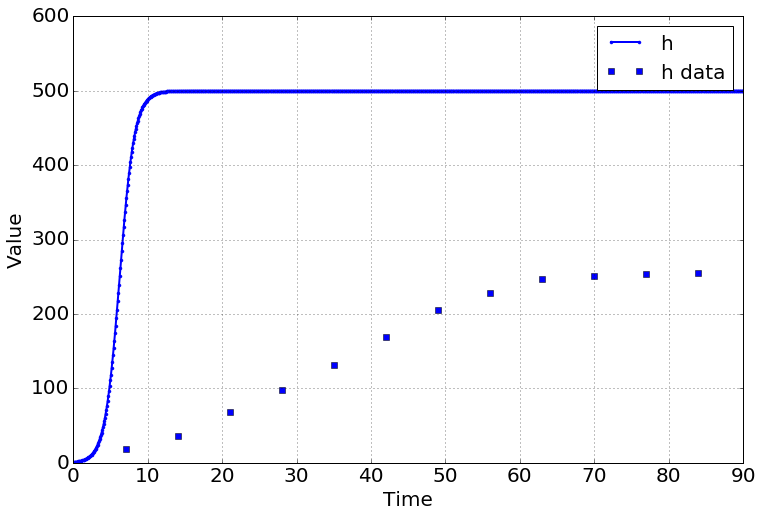

In [4]:
t=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

sim=Simulation()
sim.add("h'=a*h*(1-h/K)",1,plot=True)
sim.add_data(t=t,h=h,plot=True)
sim.params(a=1,K=500)
sim.run(0,90)

# fig=sim.figures[0]
# fig.savefig('sunflower_logistic1.pdf')
# fig.savefig('sunflower_logistic1.png')

### Fit the model parameters, $a$ and $K$, and the initial value of the variable, $h$

In [5]:
model=MCMCModel(sim,
                a=Uniform(.001,5),
                K=Uniform(100,500),
                initial_h=Uniform(0,100),
                )

when it looks weird, run mcmc again which continues from where it left off

Sampling Prior...
Done.
0.32 s
Running MCMC...
Done.
20.70 s


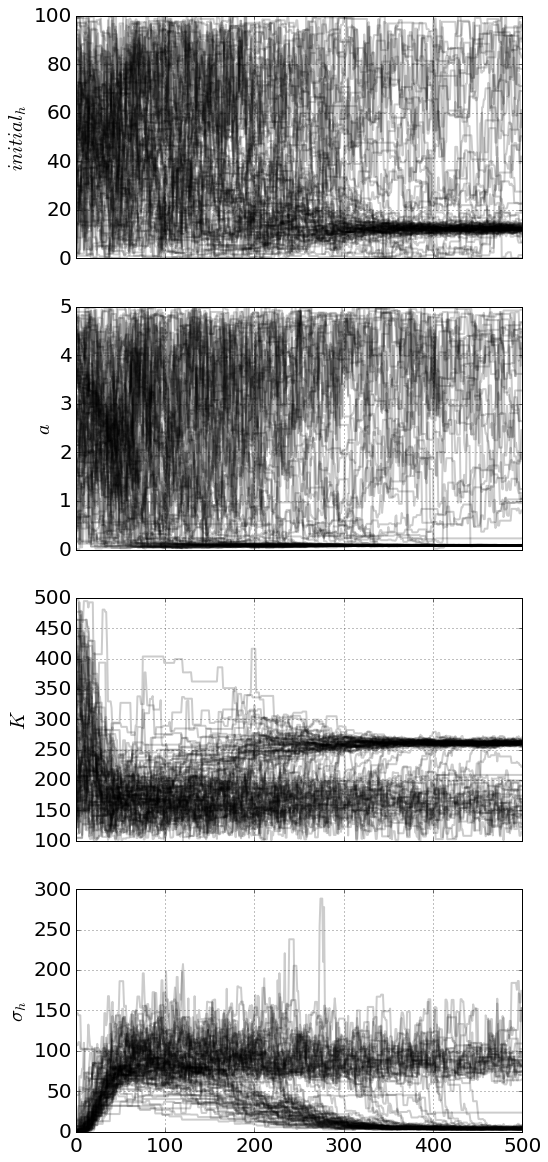

In [6]:
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
21.69 s


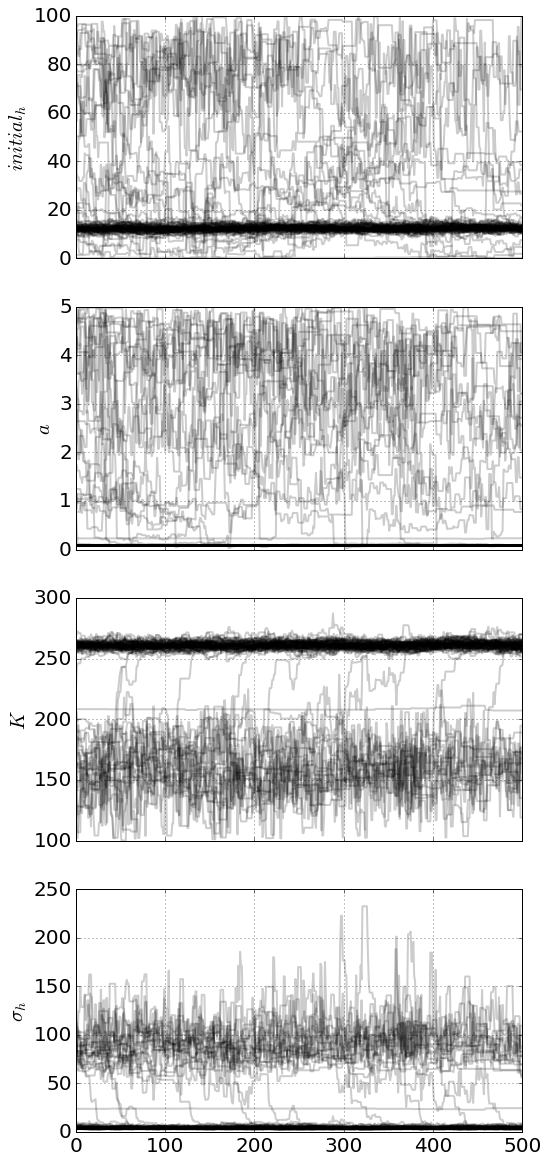

In [7]:
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
25.22 s


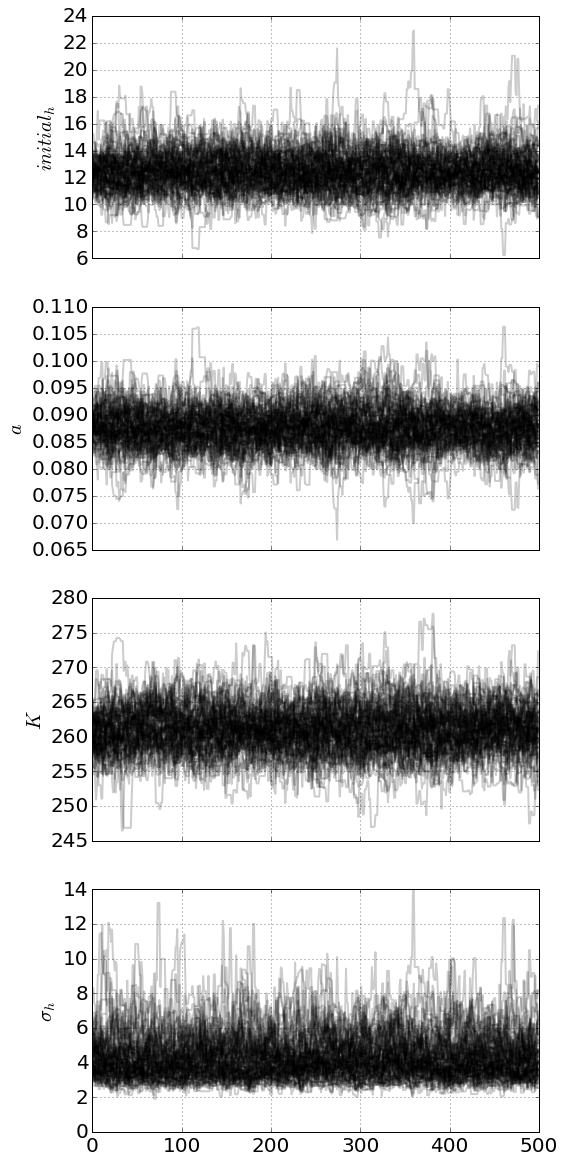

In [8]:
model.set_initial_values('samples')  # reset using the 16-84 percentile values from the samples
model.run_mcmc(500)
model.plot_chains()

In [9]:
sim.a

0.087614643163047012

In [10]:
model.best_estimates()

{'K': array([ 258.27978806,  260.97322957,  263.70116887]),
 '_sigma_h': array([ 3.18617835,  3.96033807,  5.20532762]),
 'a': array([ 0.08458444,  0.08761464,  0.09060287]),
 'initial_h': array([ 11.24387274,  12.37335903,  13.60445175])}

### Plot the Results

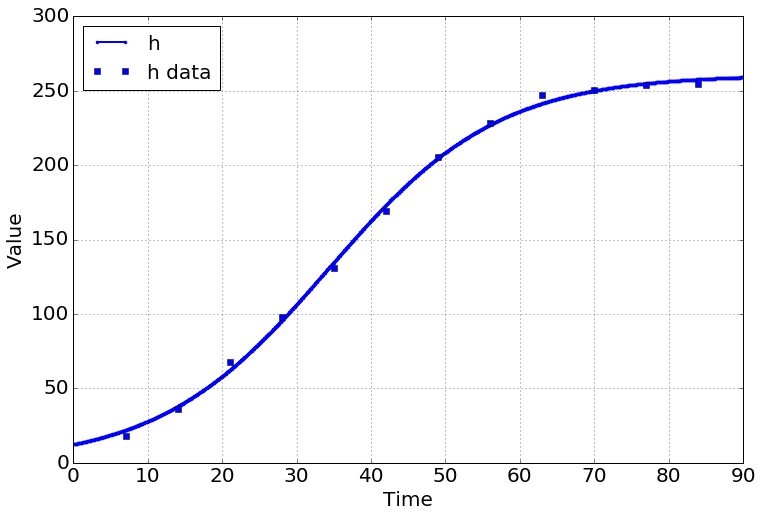

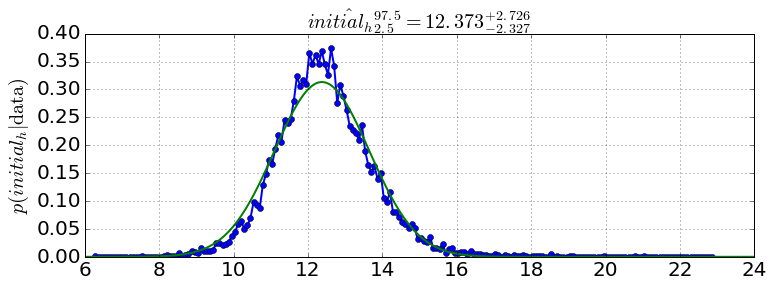

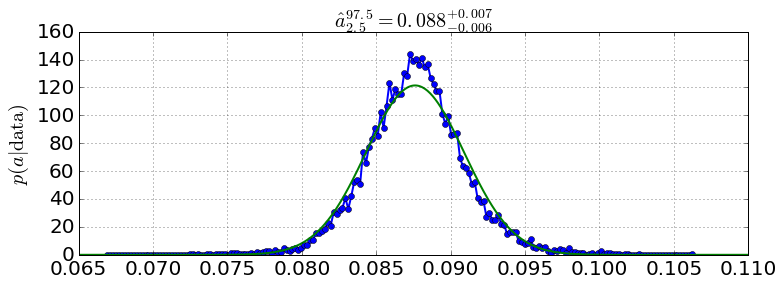

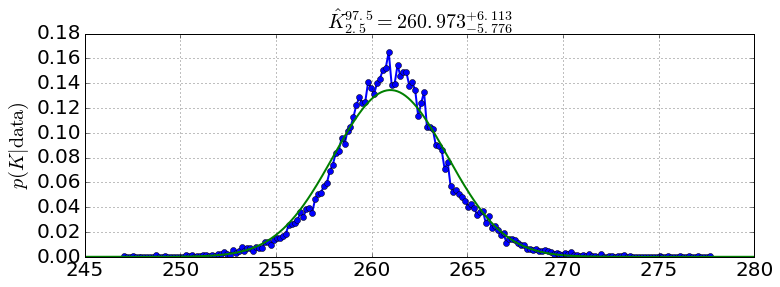

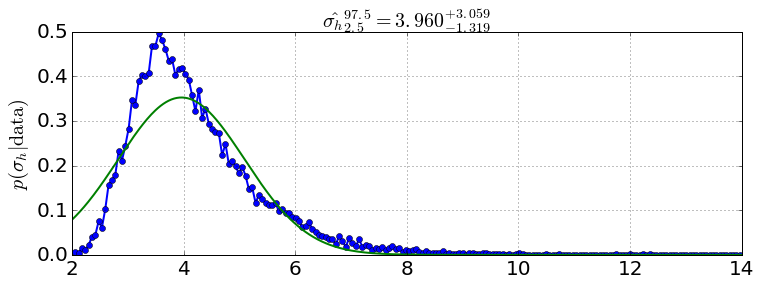

In [11]:
sim.run(0,90)
model.plot_distributions()


### Plot the joint distribution between parameters, $a$ and $K$

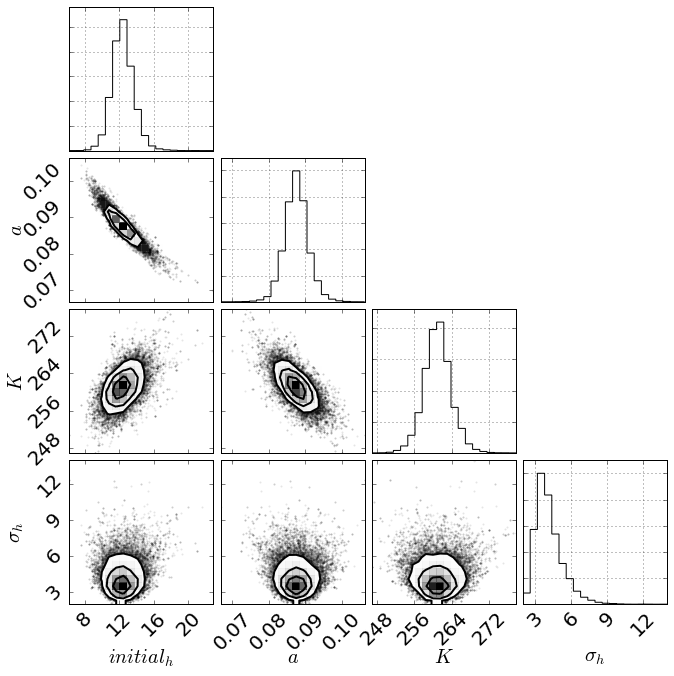

In [12]:
model.triangle_plot()

### Plot the many samples for predictions

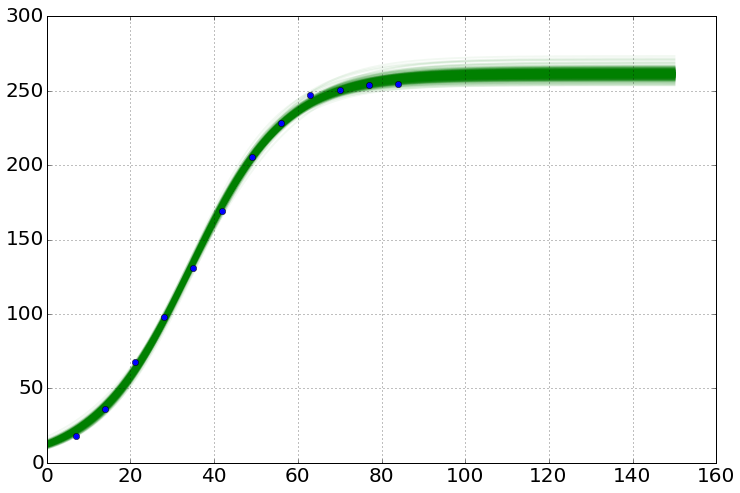

In [34]:
sim.noplots=True  # turn off the simulation plots
saved_h=[]
for i in range(500):
    model.draw()
    sim.run(0,150)
    plot(sim.t,sim.h,'g-',alpha=.05)
    saved_h.append(sim.h)
sim.noplots=False  # gotta love a double-negative
plot(t,h,'bo')  # plot the data
saved_h=array(saved_h)


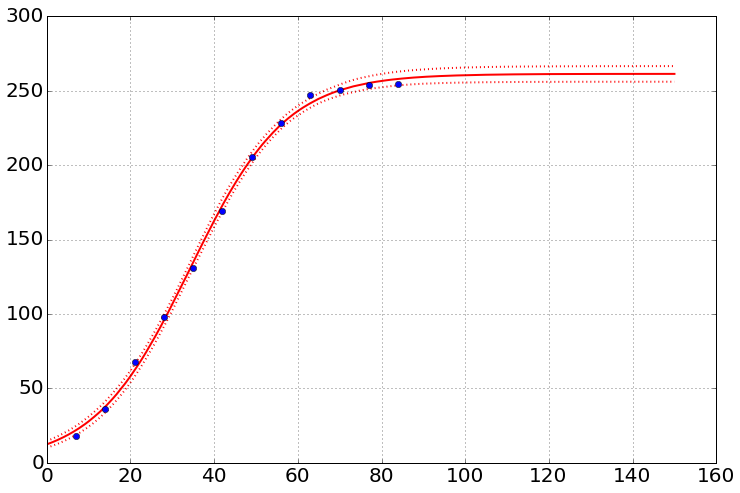

In [35]:
med=percentile(saved_h,50,axis=0)
lower=percentile(saved_h,2.5,axis=0)
upper=percentile(saved_h,97.5,axis=0)
plot(sim.t,med,'r-')
plot(sim.t,lower,'r:')
plot(sim.t,upper,'r:')

plot(t,h,'bo')  # plot the data


## SIR Model

http://healthyalgorithms.com/2010/10/19/mcmc-in-python-how-to-stick-a-statistical-model-on-a-system-dynamics-model-in-pymc/

In [2]:
from pyndamics import Simulation
from pyndamics.emcee import *

In [3]:
susceptible_data = np.array([999,997,996,994,993,992,990,989,986,984])
infected_data = np.array([1,2,5,6,7,8,9,11,13,15])

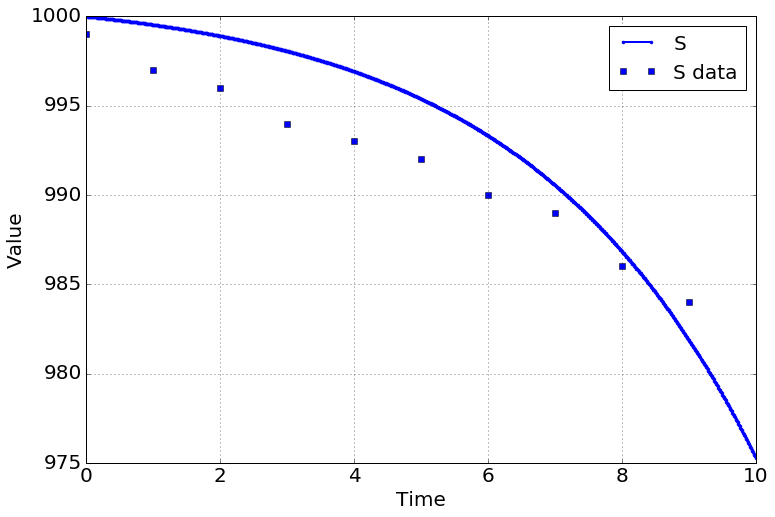

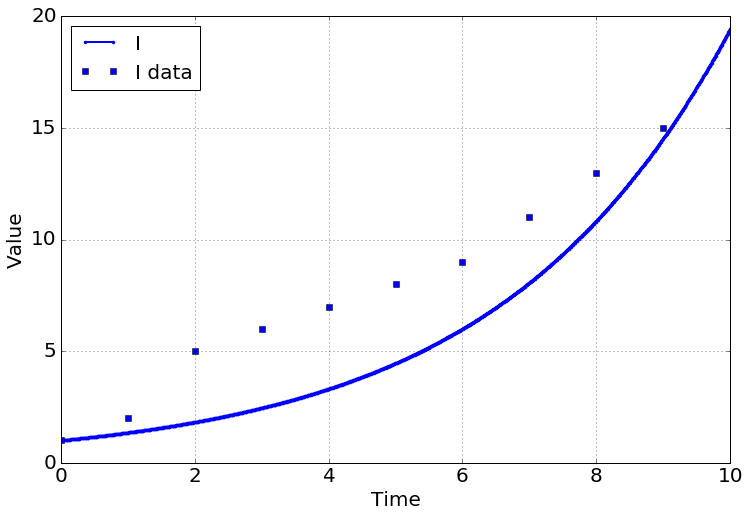

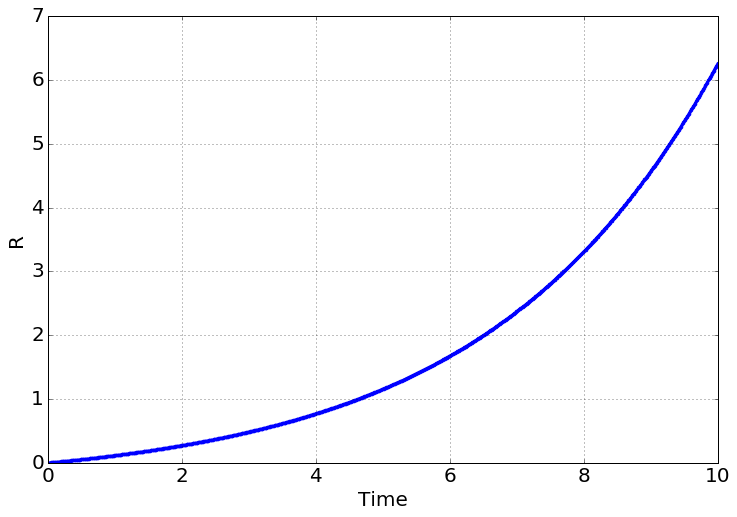

In [9]:
sim=Simulation()
sim.add("N=S+I+R")
sim.add("S'=-beta*S*I/N",1000,plot=1)
sim.add("I'=beta*S*I/N-gamma*I",1,plot=2)
sim.add("R'=gamma*I",0,plot=3)
sim.params(beta=.4,gamma=0.1)
t=np.arange(0,10,1)
sim.add_data(t=t,S=susceptible_data,plot=True)
sim.add_data(t=t,I=infected_data,plot=True)
sim.run(0,10)

In [14]:
model=MCMCModel(sim,
                beta=Uniform(0,1),
                initial_S=Uniform(500,1500),
                initial_I=Uniform(0.1,10),
                gamma=Uniform(0,1),
                )

Sampling Prior...
Done.
0.41 s
Running MCMC...
Done.
22.28 s


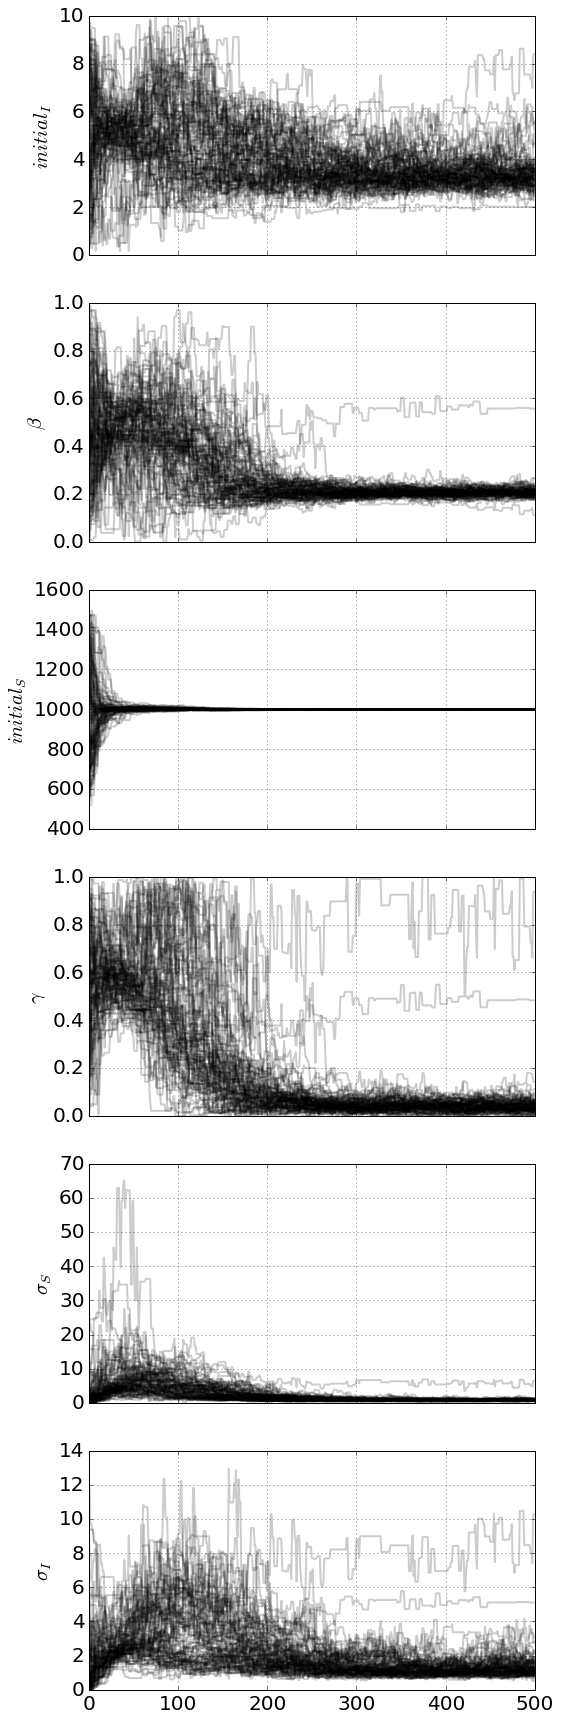

In [15]:
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
23.04 s


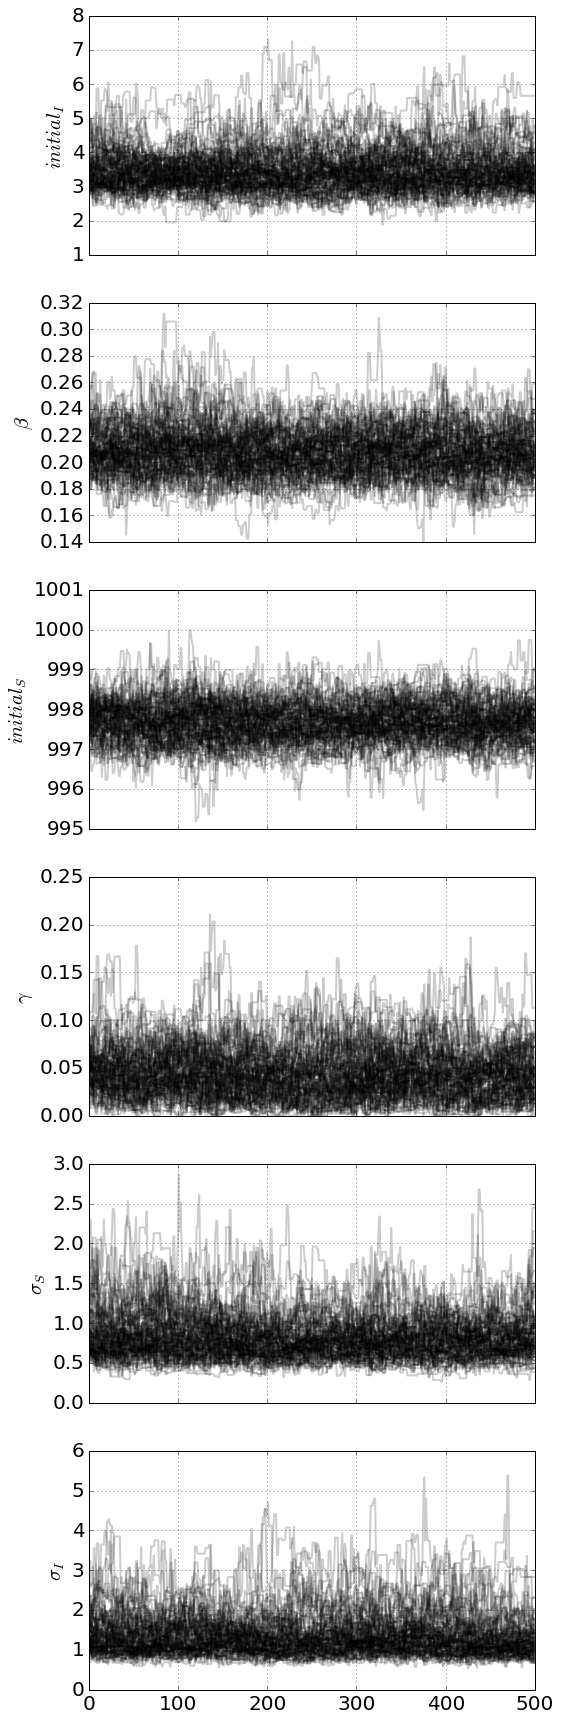

In [16]:
model.set_initial_values('samples')  # reset using the 16-84 percentile values from the samples
model.run_mcmc(500)
model.plot_chains()

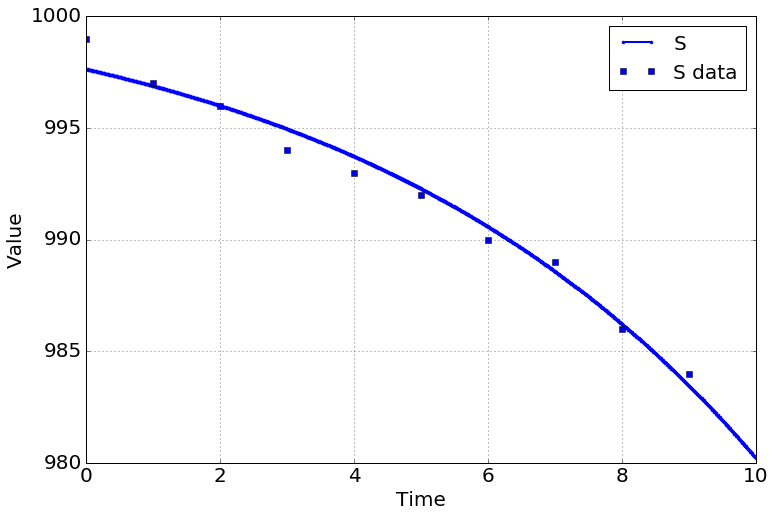

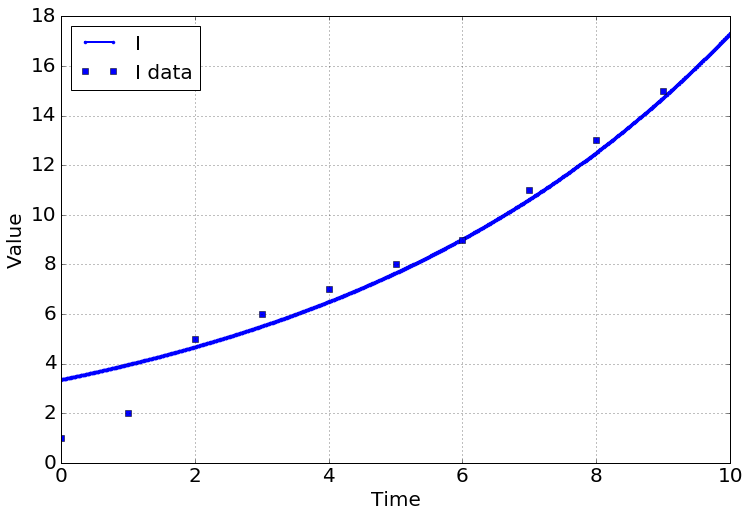

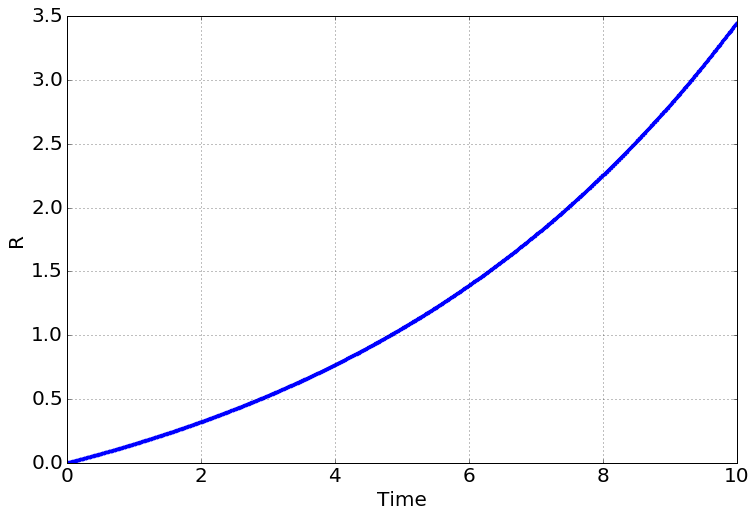

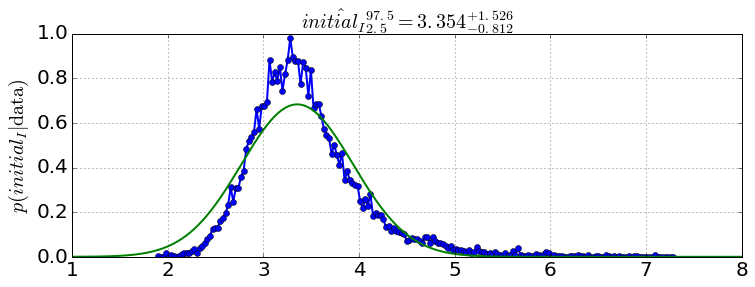

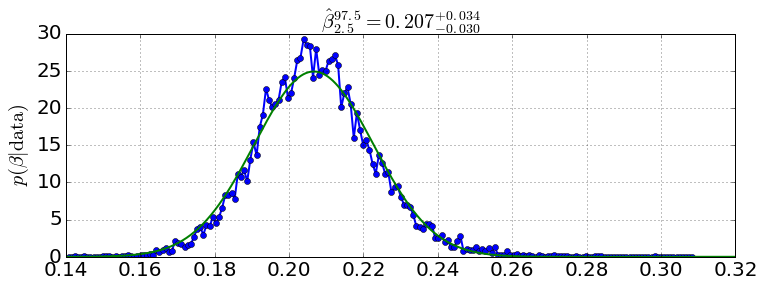

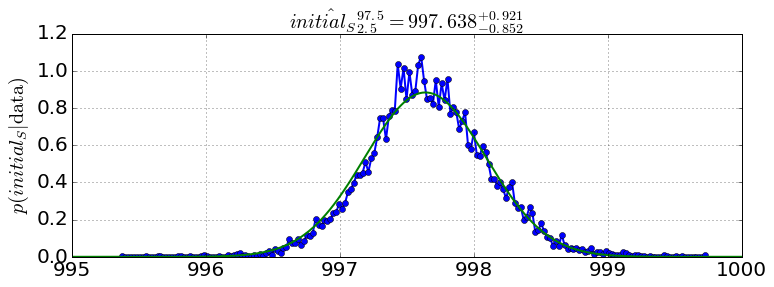

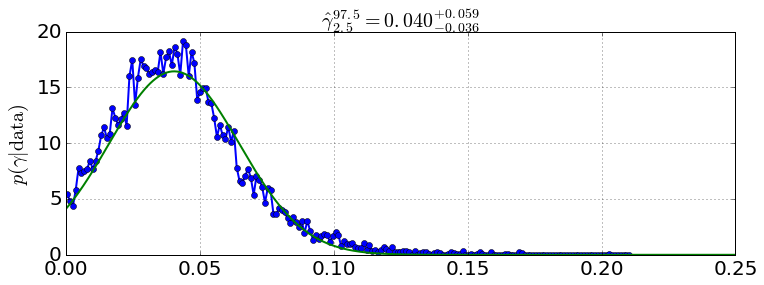

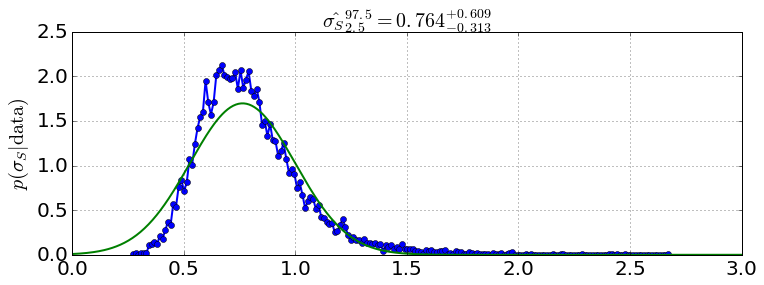

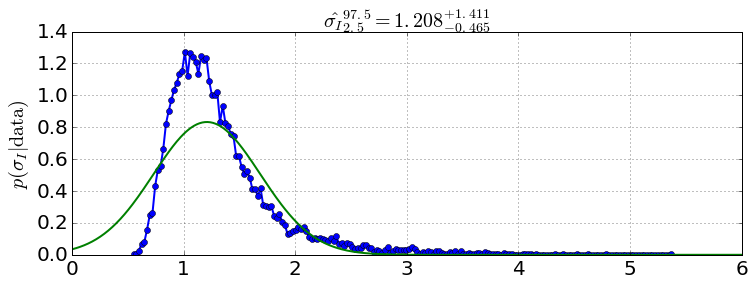

In [17]:
sim.run(0,10)
model.plot_distributions()